In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import Word2Vec
import numpy as np


In [4]:
df= pd.read_csv("data/nlp_proje_metin_siniflandirma.csv",index_col=0)
df.head()

,Text,Label
0,turkcellmüzik biraz daha gelişsin fizy yi tama...,1
1,hayat paylaşınca güzel...türkcell...,1
2,superonline varya daha iyi,1
3,hahaha kanka turkcell bu 4 ceker :d,1
4,turkcell 3 tl hediye etse bana ne güzel olur =),1


In [5]:
df["Text"] = df["Text"].astype(str)

In [6]:
import on_islem

In [7]:
df["Text_2"]=df["Text"].apply(on_islem.pre_processing)
df["Text_2"]=df["Text_2"].apply(on_islem.remove_space)
df.head()

,Text,Label,Text_2
0,turkcellmüzik biraz daha gelişsin fizy yi tama...,1,"[turkcellmüzik, dah, geliş, fizy, yi, tamame, ..."
1,hayat paylaşınca güzel...türkcell...,1,"[hayat, paylaş, güzeltürkcell]"
2,superonline varya daha iyi,1,"[superonl, varya, dah]"
3,hahaha kanka turkcell bu 4 ceker :d,1,"[hahah, kanka, turkcell, ceker]"
4,turkcell 3 tl hediye etse bana ne güzel olur =),1,"[turkcell, tl, hedi, et, ba, güzel, olur]"


In [8]:
#boş liste kontrolü
df[df["Text_2"].str[0].isnull()]

,Text,Label,Text_2
1608,:s,3,[]
2200,#turkcellesavasimvar,2,[]


In [9]:
df_index = df[df["Text_2"].str[0].isnull()].index
df = df.drop(df_index)
df = df.reset_index()
del df["index"]
df[df["Text_2"].str[0].isnull()]

,Text,Label,Text_2


In [10]:
df["Text_2"]

0       [turkcellmüzik, dah, geliş, fizy, yi, tamame, ...
1                          [hayat, paylaş, güzeltürkcell]
2                                  [superonl, varya, dah]
3                         [hahah, kanka, turkcell, ceker]
4               [turkcell, tl, hedi, et, ba, güzel, olur]
                              ...                        
2993                         [gördük, adi, şerefsiz, kur]
2994                            [se, ben, boykot, edicem]
2995    [diğer, hat, çekmedik, yer, çeke, hat, çektik,...
2996    [sanir, g, baglanti, sor, var, surekli, edge, ...
2997    [besiktas, metropol, sube, olduk, ukel, turkce...
Name: Text_2, Length: 2998, dtype: object

In [11]:
df["Text_3"] = [' '.join(w for w in item) for item in df["Text_2"]]
df

,Text,Label,Text_2,Text_3
0,turkcellmüzik biraz daha gelişsin fizy yi tama...,1,"[turkcellmüzik, dah, geliş, fizy, yi, tamame, ...",turkcellmüzik dah geliş fizy yi tamame bırakıc...
1,hayat paylaşınca güzel...türkcell...,1,"[hayat, paylaş, güzeltürkcell]",hayat paylaş güzeltürkcell
2,superonline varya daha iyi,1,"[superonl, varya, dah]",superonl varya dah
3,hahaha kanka turkcell bu 4 ceker :d,1,"[hahah, kanka, turkcell, ceker]",hahah kanka turkcell ceker
4,turkcell 3 tl hediye etse bana ne güzel olur =),1,"[turkcell, tl, hedi, et, ba, güzel, olur]",turkcell tl hedi et ba güzel olur
...,...,...,...,...
2993,gördüğüm en adi şerefsiz kurumsunuz,2,"[gördük, adi, şerefsiz, kur]",gördük adi şerefsiz kur
2994,#turkcell seni de ben boykot edicem.,2,"[se, ben, boykot, edicem]",se ben boykot edicem
2995,diğer hatların çekmediği yerde çeken her hattı...,2,"[diğer, hat, çekmedik, yer, çeke, hat, çektik,...",diğer hat çekmedik yer çeke hat çektik yer çek...
2996,"sanirim 3g baglanti sorunu var, surekli edge o...",2,"[sanir, g, baglanti, sor, var, surekli, edge, ...",sanir g baglanti sor var surekli edge oluyor i...


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["Text_3"].tolist())

In [13]:
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
set(X.toarray()[0])

{0.0,
 0.2090273779797295,
 0.3165897461897301,
 0.33055622574351307,
 0.3699255204228972,
 0.3838919999766801,
 0.4035766473163723}

In [15]:
df["Text_4"] = X.toarray().tolist()
df

,Text,Label,Text_2,Text_3,Text_4
0,turkcellmüzik biraz daha gelişsin fizy yi tama...,1,"[turkcellmüzik, dah, geliş, fizy, yi, tamame, ...",turkcellmüzik dah geliş fizy yi tamame bırakıc...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,hayat paylaşınca güzel...türkcell...,1,"[hayat, paylaş, güzeltürkcell]",hayat paylaş güzeltürkcell,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,superonline varya daha iyi,1,"[superonl, varya, dah]",superonl varya dah,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,hahaha kanka turkcell bu 4 ceker :d,1,"[hahah, kanka, turkcell, ceker]",hahah kanka turkcell ceker,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,turkcell 3 tl hediye etse bana ne güzel olur =),1,"[turkcell, tl, hedi, et, ba, güzel, olur]",turkcell tl hedi et ba güzel olur,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
2993,gördüğüm en adi şerefsiz kurumsunuz,2,"[gördük, adi, şerefsiz, kur]",gördük adi şerefsiz kur,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2994,#turkcell seni de ben boykot edicem.,2,"[se, ben, boykot, edicem]",se ben boykot edicem,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2995,diğer hatların çekmediği yerde çeken her hattı...,2,"[diğer, hat, çekmedik, yer, çeke, hat, çektik,...",diğer hat çekmedik yer çeke hat çektik yer çek...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2996,"sanirim 3g baglanti sorunu var, surekli edge o...",2,"[sanir, g, baglanti, sor, var, surekli, edge, ...",sanir g baglanti sor var surekli edge oluyor i...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [16]:
len(X.toarray()[0])

9038

In [17]:
#Tanımlamalar
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import LinearSVC

In [18]:
svm.fit(msg_train,label_train)
y_pred_class = svm.predict(msg_test)

NameError: name 'svm' is not defined

In [ ]:
svm= Pipeline([('vect',TfidfVectorizer()),('svm',LinearSVC())])

In [ ]:
msg_train,msg_test,label_train,label_test,= train_test_split(df["Text_3"].tolist(),df["Label"].tolist(),test_size=0.2,random_state= 42)

In [ ]:
df.head()

In [ ]:
len(msg_train)

In [ ]:
len(msg_test)

In [ ]:
len(label_train)

In [19]:
#KNN Algoritması uygulama
from sklearn.neighbors import KNeighborsClassifier

msg_train,msg_test,label_train,label_test,= train_test_split(df["Text_3"].tolist(),df["Label"].tolist(),test_size=0.2,random_state= 42)
knn = Pipeline([('vect',TfidfVectorizer()),('knn',KNeighborsClassifier())]) 
knn.fit(msg_train,label_train)
y_pred_class = knn.predict(msg_test)

print("knn accuracy score:",accuracy_score(label_test,y_pred_class))
print("knn f1 score:",f1_score(label_test,y_pred_class,average="weighted"))

knn accuracy score: 0.48
knn f1 score: 0.4777143588992974


In [20]:
len(msg_test)

600

In [21]:
#600 taneden kaç tanesini bilmiş
600*0.48

288.0

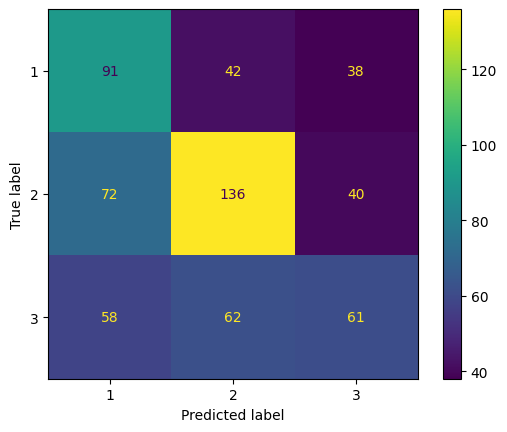

In [34]:
cm = confusion_matrix(label_test, y_pred_class, labels=np.unique(label_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(label_test))
disp.plot()


In [27]:
# Word2Vec modelini eğitme
word2vec_model = Word2Vec(df["Text_2"], min_count=1)


In [30]:
# Metinlerin Word2Vec gömme vektörlerini hesaplama
def get_sentence_embedding(sentence):
    sentence_vectors = []
    for word in sentence:
        if word in word2vec_model.wv:
            sentence_vectors.append(word2vec_model.wv[word])
    if len(sentence_vectors) == 0:
        return np.zeros(100)  # Eğer tüm kelimeler Word2Vec modelinde yoksa sıfır vektör döndürülür
    return np.mean(sentence_vectors, axis=0)

df["Text_5"] = df["Text_2"].apply(get_sentence_embedding)

In [32]:
# Word2Vec gömme vektörleriyle KNN algoritmasını kullanma
msg_train, msg_test, label_train, label_test = train_test_split(df["Text_5"].tolist(), df["Label"].tolist(), test_size=0.2, random_state=42)
knn_word2vec = KNeighborsClassifier()
knn_word2vec.fit(msg_train, label_train)
y_pred_class_word2vec = knn_word2vec.predict(msg_test)

print("KNN ile Word2Vec accuracy score:", accuracy_score(label_test, y_pred_class_word2vec))
print("KNN ile Word2Vec F1 score:", f1_score(label_test, y_pred_class_word2vec, average="weighted"))


KNN ile Word2Vec accuracy score: 0.41
KNN ile Word2Vec F1 score: 0.3819678013216179


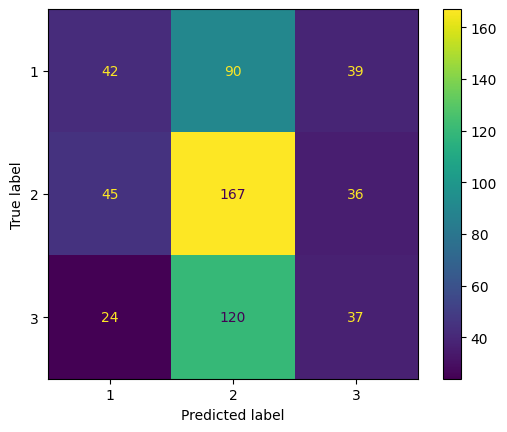

In [33]:
# Confusion Matrix
cm_word2vec = confusion_matrix(label_test, y_pred_class_word2vec, labels=knn_word2vec.classes_)
disp_word2vec = ConfusionMatrixDisplay(confusion_matrix=cm_word2vec, display_labels=knn_word2vec.classes_)
disp_word2vec.plot()